In [ ]:
"""
The primary finding from the present analysis are that:
1. There is a large fraction of crimes/reports with no Resolution
2. The types of crimes that are resolves and unresolves are mostly mutually exclusive lists
3. 'Battery' is the only crime that appears in both resolved and unresolved lists.
4. However, whether the crime has a Resolution appears to be completely random (which is a good thing).

The code and plots generated in the subsequent lines was used to arrive at these conclusions.
"""

In [344]:
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

#import San Francisco data into a pandas data frame
sf_data = pd.read_csv('sanfrancisco_incidents_summer_2014.csv',parse_dates=[4])
sf_data = sf_data.sort_values('Date')

In [345]:
#Check what are the column headings.
sf_data.columns.values

array(['IncidntNum', 'Category', 'Descript', 'DayOfWeek', 'Date', 'Time',
       'PdDistrict', 'Resolution', 'Address', 'X', 'Y', 'Location', 'PdId'], dtype=object)

In [346]:
#Get some description of the data in each column
for column in sf_data.columns.values:
    print('\n'+column+'\n')
    print(sf_data[column].describe())


IncidntNum

count    2.899300e+04
mean     1.420173e+08
std      1.853367e+07
min      1.028438e+07
25%      1.405456e+08
50%      1.406320e+08
75%      1.407197e+08
max      9.903674e+08
Name: IncidntNum, dtype: float64

Category

count             28993
unique               34
top       LARCENY/THEFT
freq               9466
Name: Category, dtype: object

Descript

count                            28993
unique                             368
top       GRAND THEFT FROM LOCKED AUTO
freq                              3766
Name: Descript, dtype: object

DayOfWeek

count      28993
unique         7
top       Friday
freq        4451
Name: DayOfWeek, dtype: object

Date

count                   28993
unique                     92
top       2014-06-28 00:00:00
freq                      410
first     2014-06-01 00:00:00
last      2014-08-31 00:00:00
Name: Date, dtype: object

Time

count     28993
unique     1379
top       12:00
freq        784
Name: Time, dtype: object

PdDistrict

count     

In [ ]:
'''
What immediately stands out from the summaries of each of the data columns is that:
1. 'LARCENY/THEFT' is the most frequent crime, accounting for ~33% of all crimes committed
2. 'GRAND THEFT FROM LOCKED AUTO' appears to be msot common type of larceny/theft.
3. Though Friday is the most frequent day for incident reports in this data set, it doesn't look like
   it may be that significantly different from the other days of week, 15.4% of all crimes occured on Friday, compared to
   14.3% if the frequency was evenly split among all 7 days.
4. The 'SOUTHERN' police district is where majority of the crimes are reported
5. The vast majority (66%) of reported incidents do not have a resolution ('NONE' in the data)
6. The next few columns, Address, X, Y, Location indicate that '800 Block of BRYANT ST' sees quite a few crimes committed.
   However, a quick google maps search reveals that this address and GPS location is that of the "Hall of Justice" in San
   Francisco (850 Bryant St, San Francisco, CA 94103). It is unlikely that so many crimes (940) occured at the same location.
   This is likely a placeholder address when the real one is not available, and should be treated as a NUll value in analysis
   involving geographic position.
   
The most interesting asepct of the data is the very low Resolution rate for the reported crimes. I want to know,
what are the crimes with the highest rate of resolution, lowest rate of resolution, and are there geographic differences
for how likely a crime is like to be resolved or not, and whether any of the other variables have predictive power in 
differentiating the two cases.
'''

In [347]:
#Let's create subset of data where there is a resolution and there is no resolution
resolved_crime = sf_data[sf_data['Resolution']!='NONE']
unresolved_crime = sf_data[sf_data['Resolution']=='NONE']

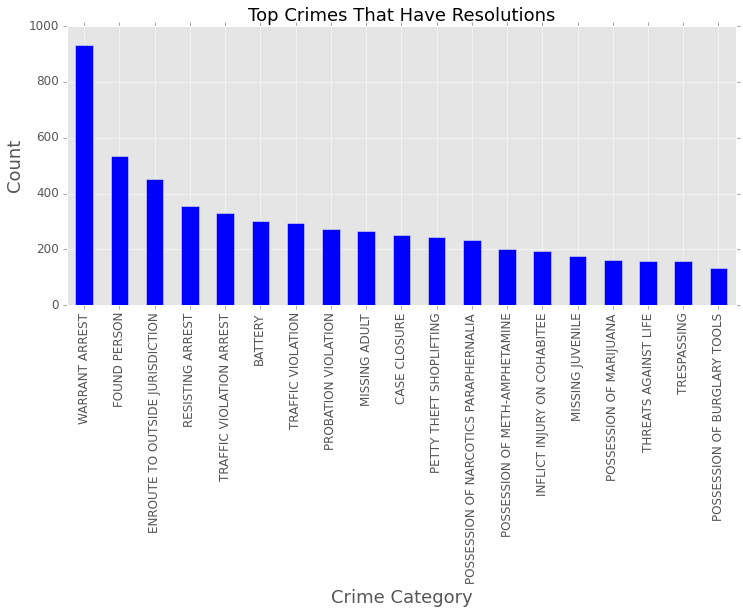

In [348]:
#Let's plot the frequencies of crimes that do have a resolution. Only the top 20 are plotted since there are 368 unique values.
fig, ax = plt.subplots()
fig.set_size_inches(12, 5)
ax.set_xlabel('Crime Category',fontsize=18)
ax.set_ylabel('Count',fontsize=18)
ax.set_title('Top Crimes That Have Resolutions',fontsize=18)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
resolved_crime['Descript'].value_counts()[:19].plot(ax=ax,kind='bar',color='b')

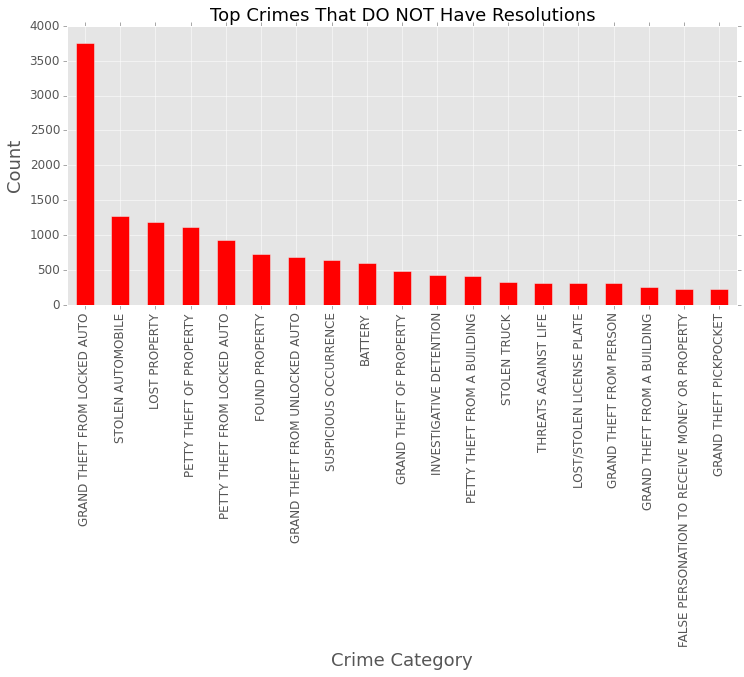

In [349]:
#Let's plot the frequencies of crimes that do NOT have a resolution. Only the top 20 are plotted since there are 368 unique values.
fig, ax = plt.subplots()
fig.set_size_inches(12, 5)
ax.set_xlabel('Crime Category',fontsize=18)
ax.set_ylabel('Count',fontsize=18)
ax.set_title('Top Crimes That DO NOT Have Resolutions',fontsize=18)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
unresolved_crime['Descript'].value_counts()[:19].plot(ax=ax,kind='bar',color='r')

In [350]:
"""
Battery is the only category that appears in both unresolved and resolved cases (603 and 300 respectively),
as can be seen in the above figures. Other than that, the lists of most frequent types of resolved and unresolved 
crimes are mutually exclusive. The question I would like to now answer is whether resolution of a Battery crime occurs 
randomly, or is there an indicator in the data that might suggest otherwise?
"""
print(resolved_crime[resolved_crime['Descript']=='BATTERY'].shape)
print(unresolved_crime[unresolved_crime['Descript']=='BATTERY'].shape)

(300, 13)
(603, 13)


(590, 13)


C:\Users\Alex\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


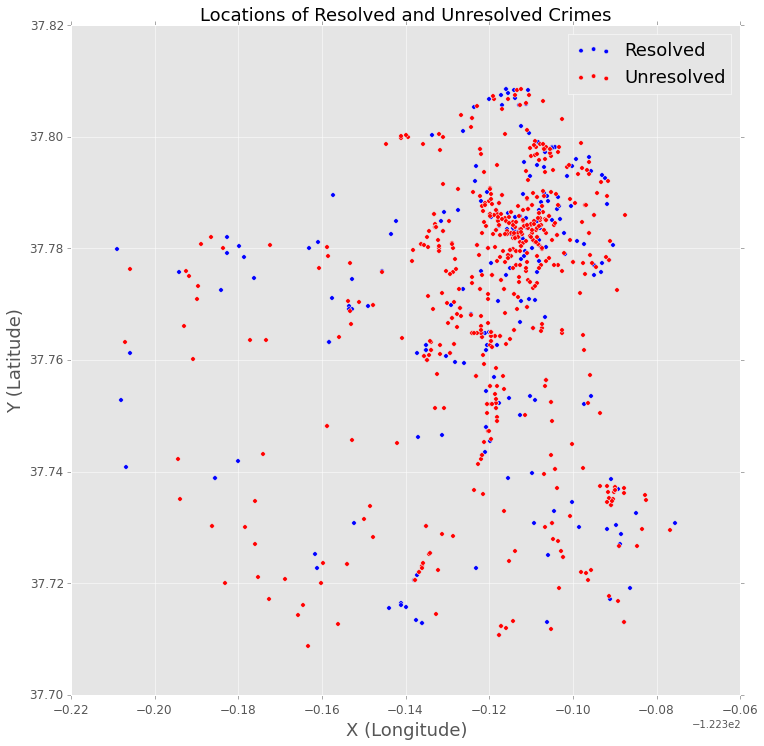

In [378]:
#Filter and subset the data into a resolved and unresolved data sets. 
#I would then like to plot the occurance of each vs geographic location to see if there is a pattern.
#It was identified earlier that '800 Block of BRYANT ST' appears to be a placeholder, and it is
#therefore filtered out for this part of the analysis.
resolved_battery_crimes = resolved_crime[(resolved_crime['Descript']=='BATTERY') & (resolved_crime['Address']!='800 Block of BRYANT ST')]
unresolved_battery_crimes = unresolved_crime[(unresolved_crime['Descript']=='BATTERY') & (unresolved_crime['Address']!='800 Block of BRYANT ST')]

#Plot both resolves and unresolved Battery crimes as a function of Longitude and Latitude (X,Y)
fig, ax = plt.subplots()
fig.set_size_inches(12, 12)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
plt1=resolved_battery_crimes.plot(ax=ax,kind='scatter',x='X',y='Y',color='b',legend=True)
plt2=unresolved_battery_crimes.plot(ax=ax,kind='scatter',x='X',y='Y',color='r',legend=True)
print(unresolved_battery_crimes.shape)
ax.set_xlabel('X (Longitude)',fontsize=18)
ax.set_ylabel('Y (Latitude)',fontsize=18)
ax.legend((plt1,plt2),labels=('Resolved','Unresolved'),loc=0,fontsize=18)
ax.set_title('Locations of Resolved and Unresolved Crimes',fontsize=18)

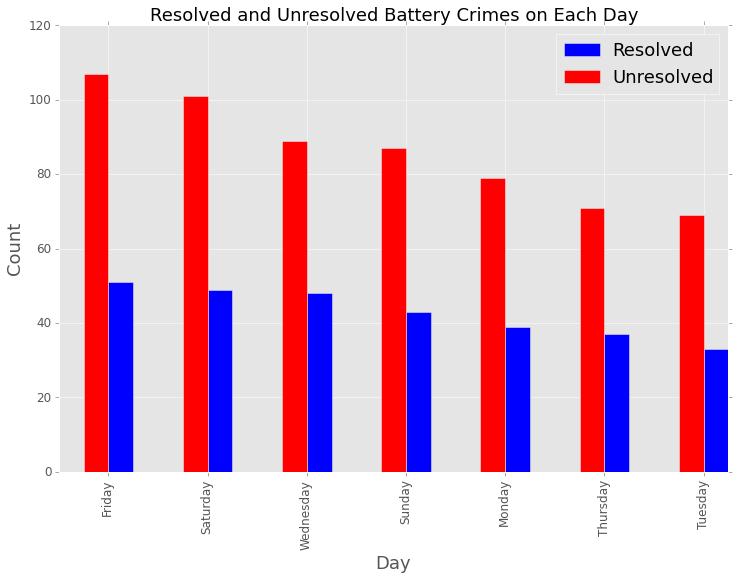

In [352]:
"""
Based on a visual inspection of the plot above, the geographic location does not appear to play a significant role in determining
whether a particular Battery crime will be resolved or not.

However, there are more variables which could have some predicitive power.
"""

#reverting the filter which excluded the '800 Block of BRYANT ST' geographic location
resolved_battery_crimes = resolved_crime[(resolved_crime['Descript']=='BATTERY')]
unresolved_battery_crimes = unresolved_crime[(unresolved_crime['Descript']=='BATTERY')]

#plotting the nunmber of Battery crimes as a function of each day of the week
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
ax.set_xlabel('Day',fontsize=18)
ax.set_ylabel('Count',fontsize=18)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
plt1=resolved_battery_crimes['DayOfWeek'].value_counts().plot(ax=ax,kind='bar',color='b',position=0,width=0.25)
plt2=unresolved_battery_crimes['DayOfWeek'].value_counts().plot(ax=ax,kind='bar',color='r',position=1,width=0.25)
ax.legend((plt1,plt2),labels=('Resolved','Unresolved'),loc=0,fontsize=18)
ax.set_title('Resolved and Unresolved Battery Crimes on Each Day',fontsize=18)

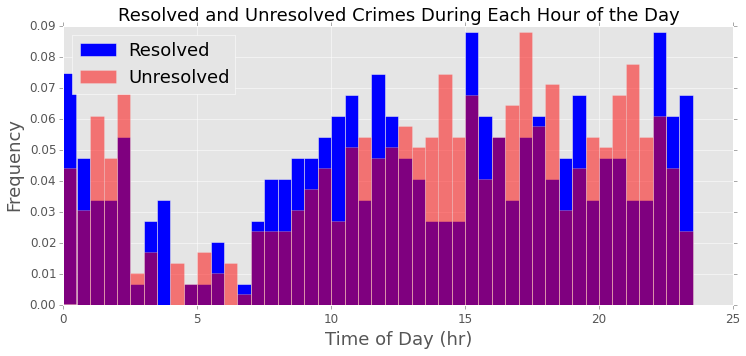

In [373]:
"""
The day of the weak also does not appear to be a strong indicator of whether a Battery crime will be resolves or not.
"""

#Pulling out the time of day to see if it has any predictive power
resolved_time_series = resolved_battery_crimes['Time']
unresolved_time_series = unresolved_battery_crimes['Time']
def conv_time(i): #function to parse the time string into a decimal format
    hour = i.split(':')[0]
    minutes = i.split(':')[1]
    return(float(hour)+float(minutes)/60)

resolved_time_series = resolved_time_series.map(conv_time)
unresolved_time_series = unresolved_time_series.map(conv_time)

#Plotting histograms of times when resolves and unresolves Battery crimes occured
fig, ax = plt.subplots()
fig.set_size_inches(12, 5)
ax.set_xlabel('Time of Day (hr)',fontsize=18)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
plt1=resolved_time_series.plot(ax=ax,kind='hist',normed=True,bins=np.arange(0,24,0.5),color='b')
plt2=unresolved_time_series.plot(ax=ax,kind='hist',normed=True,bins=np.arange(0,24,0.5),color='r',alpha=0.5)
ax.set_ylabel(ylabel='Frequency',fontsize=18)
ax.legend((plt1,plt2),labels=('Resolved','Unresolved'),loc=2,fontsize=18)
ax.set_title('Resolved and Unresolved Crimes During Each Hour of the Day',fontsize=18)

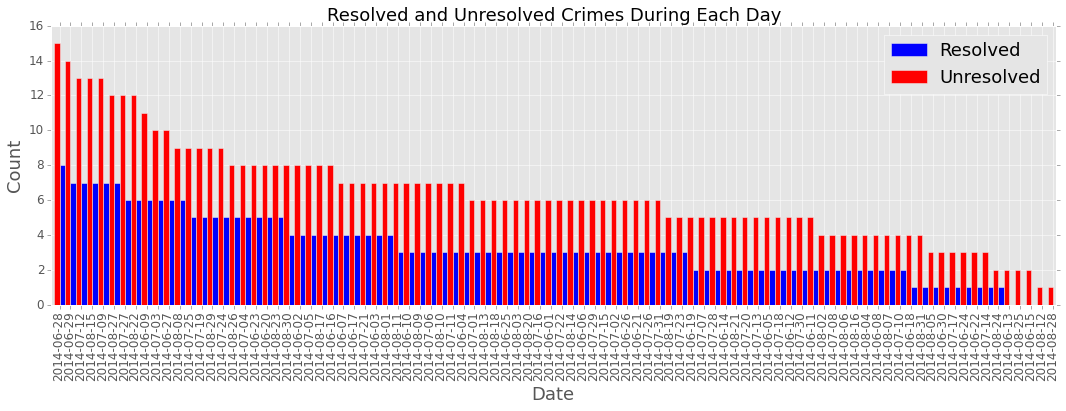

In [386]:
"""
The above figure is a comparison of normalized histograms for times of day when Resolved and Unresolved Battery Crimes
Occured. The purple areas of each column is the overlap between the two categories. It is clear that both cases
occured with similar frequencies throughout various hours of the day.

This means that the time of day is also not a strong indicator of whether a Battery gets resolved or not.
"""


#Perhaps Dates have some predictive power?
resolved_days=resolved_battery_crimes['Date']
unresolved_days=unresolved_battery_crimes['Date']

#Plotting counts of resolved and unresolved Battery crimes on each day, sorted in descending order of Days with the most crimes.
fig, ax = plt.subplots()
fig.set_size_inches(18, 5)
ax.set_xlabel('Date',fontsize=18)
ax.set_ylabel('Count',fontsize=18)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
plt1=resolved_days.value_counts(sort=True).plot(ax=ax,kind='bar',color='b',position=0)
plt2=unresolved_days.value_counts(sort=True).plot(ax=ax,kind='bar',color='r',position=1)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels = [i.split()[0] for i in labels]
ax.set_xticklabels(labels);
ax.legend((plt1,plt2),labels=('Resolved','Unresolved'),loc=0,fontsize=18)
ax.set_title('Resolved and Unresolved Crimes During Each Day',fontsize=18)

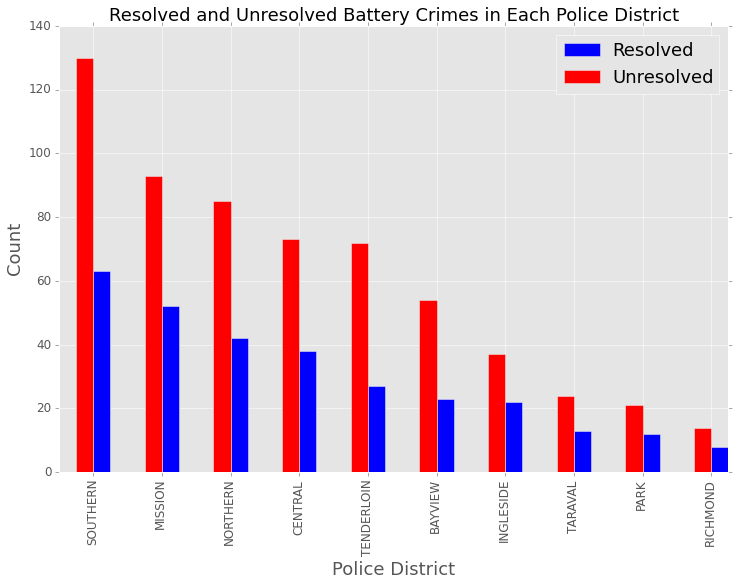

In [376]:
"""
The above figure shows that both Resolves and Unresolves crimes follow the same trends. It doesn't appear that
there was any time during the summer when there were particular more resolved or unresolves Battery cases.
"""

#Police district of where the crime was reported is the last variable that is left
resolved_districts=resolved_battery_crimes['PdDistrict']
unresolved_districts=unresolved_battery_crimes['PdDistrict']

#plotting the nunmber of Battery crimes commited in each police district
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
ax.set_xlabel('Police District',fontsize=18)
ax.set_ylabel('Count',fontsize=18)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
plt1=resolved_districts.value_counts().plot(ax=ax,kind='bar',color='b',position=0,width=0.25)
plt2=unresolved_districts.value_counts().plot(ax=ax,kind='bar',color='r',position=1,width=0.25)
ax.legend((plt1,plt2),labels=('Resolved','Unresolved'),loc=0,fontsize=18)
ax.set_title('Resolved and Unresolved Battery Crimes in Each Police District',fontsize=18)

In [ ]:
"""
Once again, trends appear to be pretty conistent. There don't appear to be any police district that do a particularly better
job of resolving Battery crimes.

The only conclusion that can be made based on the data given is that whether a Battery crime will have a resolution or not 
is pretty random.
"""